<a href="https://colab.research.google.com/github/PaolaMaribel18/hands-on-2023A/blob/master/notebooks/TallerKNN_HDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN: Handwritten Digit Recognition

**Description:**
Provide students with a dataset of handwritten digits (eg. the MNIST dataset).

The task is to implement the k-Nearest Neighbors algorithm to classify the digits correctly.

###1. Data Preprocessing

####Importing libraries

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

####Proper data preprocessing

#####Load dataset

In [ ]:
# Load MNIST from scikit-learn
mnist = datasets.fetch_openml("mnist_784")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
digits = datasets.load_digits()

In [ ]:
X = digits.data
y = digits.target

#####Scaling

In [ ]:
X = X / 255.0  # Scale the pixel values to the range [0, 1]

#####Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###2. Model Building

Selection of an aprpropiate 'k' value and implementation of knn algorithm

In [ ]:
#The choice of the k value in K-Nearest Neighbors (KNN) is a critical decision and should be based on experimentation and problem-specific considerations.
# In the context of classifying handwritten digits using KNN, k=5
k_value = 5
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train, y_train)

KNeighborsClassifier()

###3. Model Evaluation

Evaluation of the model using accuracy, precision, recall, f1-score

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9861
Precision: 0.9862
Recall: 0.9861
F1 Score: 0.9861


### 4. Visualization

Visualization of some correctly and incorrectly classified digits

In [ ]:
correctly_classified = np.where(y_pred == y_test)[0]
incorrectly_classified = np.where(y_pred != y_test)[0]


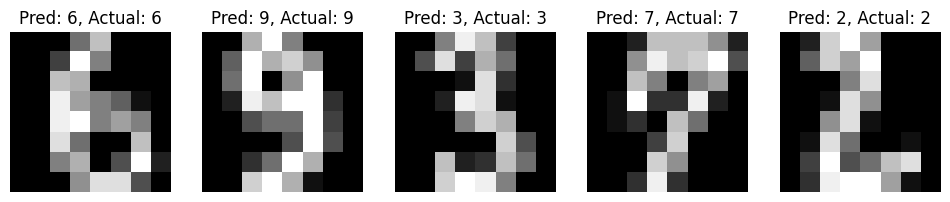

In [ ]:
plt.figure(figsize=(12, 6))
for i, idx in enumerate(correctly_classified[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f'Pred: {y_pred[idx]}, Actual: {y_test[idx]}')
    plt.axis('off')

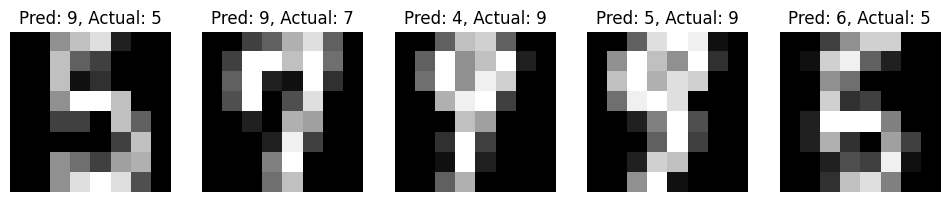

In [ ]:
plt.figure(figsize=(12, 6))
for i, idx in enumerate(incorrectly_classified[:5]):
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f'Pred: {y_pred[idx]}, Actual: {y_test[idx]}')
    plt.axis('off')